In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("incl/")

import ELPH_utils
import ELPH_Dim_Reducer

from RedDimApprox import RedDimApprox

In [2]:
runs = ELPH_utils.load_runs(filename='../runs_n_kmax=80.npz')

# runs = runs[:100:1]
# for k in range(len(runs)):
#     runs[k] = runs[k][:,::2]

n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

1000 loaded with n_kmax = 80


In [3]:
# dim_reducer = ELPH_Dim_Reducer.SVD()
dim_reducer = ELPH_Dim_Reducer.FFT(sorted=True)
# dim_reducer = ELPH_Dim_Reducer.Hermite(sample_max = 1.856, sorted=True, optimize=False)

model = RedDimApprox(runs, dim_reducer)
model.train()

print(model.get_error(runs[9], rdim=20, norm='std'))

0.02371554691261793


In [4]:
# dim_reducer = ELPH_Dim_Reducer.SVD()
# dim_reducer = ELPH_Dim_Reducer.FFT(sorted=True)
dim_reducer = ELPH_Dim_Reducer.Hermite(sample_max = 1.856, sorted=True, optimize=False)

model = RedDimApprox(dim_reducer=dim_reducer)

train_kwargs = {}
score_kwargs = {'norm':'std', 'rdim':20}

m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs=train_kwargs, score_kwargs=score_kwargs)

print(m)
print(s)

0.007585193948544222
[0.007836101087196597, 0.0076575691919554675, 0.0076896884943804915, 0.007238436613055761, 0.007504174356132792]


In [8]:
norm = 'std'

n_kmax_ar = [10,20,30,40,50,60,70,80,90,100]

dim_reducer = ELPH_Dim_Reducer.SVD()
# dim_reducer = ELPH_Dim_Reducer.FFT(sorted=True)
# dim_reducer = ELPH_Dim_Reducer.Hermite(sample_max = 1.856, sorted=True, optimize=True)

model = RedDimApprox(dim_reducer=dim_reducer)

rdim_buffer = 5
previous_min_rdim = 1 + rdim_buffer
min_rdim_ar = []

for k, n_kmax in enumerate(n_kmax_ar):
    runs = ELPH_utils.load_runs(filename='../runs_n_kmax='+str(n_kmax)+'.npz')
    n_runs = len(runs)
    assert n_kmax == runs[0].shape[0]
    
    print(n_runs, 'loaded with n_kmax =', n_kmax)
    
    for rdim in range(previous_min_rdim-rdim_buffer,n_kmax+1):
        score_kwargs = {'norm':norm, 'rdim':rdim}
        m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={}, score_kwargs=score_kwargs)
#         print('rdim:', rdim, 'mean score', m)
        
        if m < 0.01:
            previous_min_rdim = rdim
            min_rdim_ar.append(rdim)
            print('min rdim:', rdim, 'mean score', m)
            break
    

1000 loaded with n_kmax = 10
min rdim: 6 mean score 0.005966383874810521
1000 loaded with n_kmax = 20
min rdim: 6 mean score 0.009311805931245037
1000 loaded with n_kmax = 30
min rdim: 6 mean score 0.009631491641113644
1000 loaded with n_kmax = 40
min rdim: 7 mean score 0.008153916337629567
1000 loaded with n_kmax = 50
min rdim: 7 mean score 0.008188936305151141
1000 loaded with n_kmax = 60
min rdim: 7 mean score 0.008222519524057668
1000 loaded with n_kmax = 70
min rdim: 7 mean score 0.008290497739961544
1000 loaded with n_kmax = 80
min rdim: 7 mean score 0.008322841483511461
1000 loaded with n_kmax = 90
min rdim: 7 mean score 0.008332956189067564
1000 loaded with n_kmax = 100
min rdim: 7 mean score 0.008338993860141971


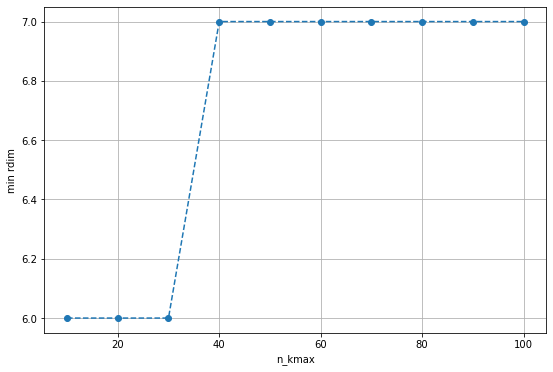

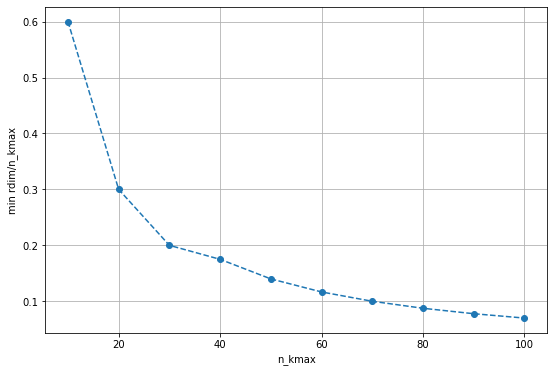

In [9]:
n_kmax_ar = np.asarray(n_kmax_ar)
min_rdim_ar = np.asarray(min_rdim_ar)


plt.grid()
plt.plot(n_kmax_ar,min_rdim_ar, '--', marker='o')
plt.xlabel('n_kmax')
plt.ylabel('min rdim')
plt.show()


plt.grid()
plt.plot(n_kmax_ar,min_rdim_ar/n_kmax_ar, '--', marker='o')
plt.xlabel('n_kmax')
plt.ylabel('min rdim/n_kmax')
plt.show()